<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/06_02_simple_nn_hand_calculation_with_pythorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Loss = 0.2956
Epoch 10: Loss = 0.1482
Epoch 20: Loss = 0.0808
Gradients:
dL/dW2: tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
dL/db2: tensor([[0., 0.]])
dL/dW1: tensor([[0., 0., 0.],
        [0., 0., 0.]])
dL/db1: tensor([[0., 0., 0.]])
Weights
W2: tensor([[ 0.5264,  0.0351],
        [ 0.3955, -0.2969],
        [ 0.6075, -0.1172]], requires_grad=True)
b2: tensor([[ 0.5128, -0.8625]], requires_grad=True)
W1: tensor([[0.0913, 0.2324, 0.3201],
        [0.3974, 0.5095, 0.6059]], requires_grad=True)
b1: tensor([[-0.0102,  0.0382,  0.0236]], requires_grad=True)
Final prediction: [[0.7991853 0.2572867]]


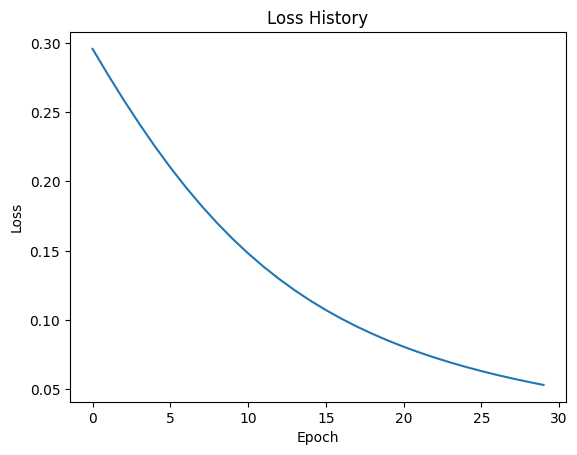

In [1]:
# PyTorch Manual Neural Network Example with Specific Values
import torch
import math

# Set seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
input_size = 2
hidden_size = 3
output_size = 2
lr = 0.3
epochs = 30


# Input values
i1, i2 = 0.85, 0.25
x = torch.tensor([[i1, i2]], dtype=torch.float32)

# Target output
y_true = torch.tensor([[1.0, 0.0]], dtype=torch.float32)

# Initialize weights and biases with given values
W1 = torch.tensor([[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6]], dtype=torch.float32, requires_grad=True)
b1 = torch.tensor([[0.0, 0.0, 0.0]], dtype=torch.float32, requires_grad=True)

W2 = torch.tensor([[0.25, 0.50],
                   [0.1, 0.2],
                   [0.3, 0.4]], dtype=torch.float32, requires_grad=True)
b2 = torch.tensor([[0.0, 0.0]], dtype=torch.float32, requires_grad=True)


# Training loop
loss_history = []
for epoch in range(epochs):
    # Forward pass
    z1 = x @ W1 + b1
    a1 = torch.sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = torch.sigmoid(z2)

    # Mean squared error loss
    loss = torch.mean((y_true - y_pred) ** 2)
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Gradient descent step
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Zero the gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Print gradients for verification
print("Gradients:")
print("dL/dW2:", W2.grad)
print("dL/db2:", b2.grad)
print("dL/dW1:", W1.grad)
print("dL/db1:", b1.grad)

# Print weights
print("Weights")
print("W2:", W2)
print("b2:", b2)
print("W1:", W1)
print("b1:", b1)

# Final prediction
print("Final prediction:", y_pred.detach().numpy())

# Plot loss history
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()

